In [21]:
from myutils import Datasets as ds
from myutils import Helpers as h
import numpy as np
from matplotlib import pyplot as plt

#Magic Command, so changes in myutils module are reloaded
%load_ext autoreload
%autoreload 1
%aimport myutils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Concat=True, combines the training and test dataset.

Here to have more data to evalutate the complexity measures (no split is needed in this step, so why not use all of the data)

In [2]:
data = ds.get_all_data(concat=True)

In [5]:
for dataset in data:
    data[dataset]["x_pca"] = h.PCA(data[dataset]["x"],n_components=4, reshape=False)

In [59]:
for dataset in data:
    x = data[dataset]["x_pca"]
    y = data[dataset]["y"]

    unique_y = np.unique(y)

    classes = {}
    for label in unique_y:
        classes[label] = x[y == label]

    fdr = np.zeros(4)
    for fi in range(4):

        zähler = list()
        for j in unique_y:
            for k in unique_y:
                if j != k:
                    p_cj = len(classes[j]) / len(x)
                    p_ck = len(classes[k]) / len(x)

                    u_cj = np.mean(classes[j][:,fi], axis=0)
                    u_ck = np.mean(classes[k][:,fi], axis=0)

                    zähler.append(p_cj*p_ck*(np.power((u_cj-u_ck),2)))


        nenner = list()
        for j in unique_y:
            p_cj = len(classes[j]) / len(x)
            sigma_cj = np.std(classes[j][:,fi], axis=0)
            nenner.append(p_cj*(np.power(sigma_cj,2)))

        
        fdr[fi] = np.sum(zähler)/np.sum(nenner)
    print(dataset)
    print(fdr)
    print()
    print(fdr)
    data[dataset]["fdr"] = fdr



    

ALL_NUMBERS
[2.81173627 3.80091595 0.47742415 1.44197464]

SIX_AND_NINES
[8.5488589  0.06026788 0.02749829 0.01466895]

ONLY_SIXES
[0. 0. 0. 0.]

RANDOM
[0.00012013 0.00018603 0.00041621 0.00020144]

SAMEPICTURE
[3.05274865e+27 3.85925850e-26 2.08798270e-35 1.09143906e-34]



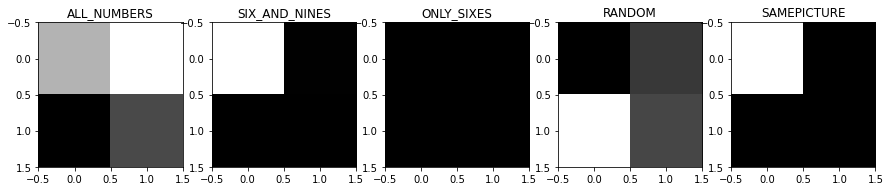

In [56]:
i=0
# plot fdr in grid
fig, ax = plt.subplots(1,5,figsize=(15,10))
for dataset in data:
    
    ax[i].imshow(data[dataset]["fdr"].reshape(2,2), cmap="gray")
    ax[i].set_title(dataset)

    i+=1